A basic strategy on ETH  ---
Buy the 13 day high, go long, exit on a 10 day low. 
Sell the 13 day low, go short, exit on the 10 day high.

In [67]:
#import librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import vectorbtpro as vbt
import warnings
warnings.filterwarnings('ignore')

# settings for vbt 
vbt.settings.set_theme('dark') 
# set height of plots
vbt.settings.plotting['layout']['height'] = 300

In [68]:
data = vbt.BinanceData.fetch("ETHUSDT", start="2021-01-01") # creates a vectorbt object of the data (useful if you want to do other vbt things)

0it [00:00, ?it/s]

In [69]:
eth = data.get(['Open', 'High', 'Low', 'Close']) # grabs the OHLC data from the vectorbt object

In [70]:
#get data 
data_folder = "~/Documents/coding/data/"
#file_name = "BTCUSDT_1d.csv"
eth_file_name = "ETHUSDT_1d.csv"

# #eth= pd.read_csv(data_folder + eth_file_name,
#                   index_col=0, # changes index to open time
#                   parse_dates=True # changes index to datetime aka reads string as a date 
#                   )

eth

,Open,High,Low,Close
Open time,,,,
2021-01-01 00:00:00+00:00,736.42,749.00,714.29,728.91
2021-01-02 00:00:00+00:00,728.91,787.69,714.91,774.56
2021-01-03 00:00:00+00:00,774.44,1011.07,768.71,978.28
2021-01-04 00:00:00+00:00,978.33,1162.97,890.00,1041.43
2021-01-05 00:00:00+00:00,1041.45,1134.60,974.45,1099.56
...,...,...,...,...
2023-05-21 00:00:00+00:00,1819.42,1828.98,1797.21,1804.91
2023-05-22 00:00:00+00:00,1804.91,1828.27,1792.01,1817.35
2023-05-23 00:00:00+00:00,1817.36,1872.50,1815.24,1854.05


In [71]:
# Calculate the 10 day high and low 
eth['10_day_high'] = eth['High'].rolling(10).max()
eth['10_day_low'] = eth['Low'].rolling(10).min()
#calculate the 13 day high and low 
eth['13_day_high'] = eth['High'].rolling(13).max()
eth['13_day_low'] = eth['Low'].rolling(13).min()


In [72]:
# Calculate long trading signals 
entries = eth['long_entry'] = eth['High'] > eth['13_day_high'].shift(1)
exits = eth['long_exit'] = eth['Low'] < eth['10_day_low'].shift(1)

# Calculate short trading signals
short_entries = eth['short_entry'] = eth['Low'] < eth['13_day_low'].shift(1)
short_exits = eth['short_exit'] = eth['High'] > eth['10_day_high'].shift(1)


In [73]:
# Checking things out to make sure all looks well

print(eth[eth['long_entry'] == True]['Close'].head(3))
print(eth[eth['long_exit'] == True]['Close'].head(3))
print(eth[eth['short_entry'] == True]['Close'].head(3))
print(eth[eth['short_exit'] == True]['Close'].head(3))

Open time
2021-01-19 00:00:00+00:00    1365.36
2021-01-25 00:00:00+00:00    1317.88
2021-02-02 00:00:00+00:00    1511.87
Name: Close, dtype: float64
Open time
2021-02-22 00:00:00+00:00    1777.58
2021-02-23 00:00:00+00:00    1577.89
2021-02-28 00:00:00+00:00    1419.18
Name: Close, dtype: float64
Open time
2021-02-22 00:00:00+00:00    1777.58
2021-02-23 00:00:00+00:00    1577.89
2021-02-28 00:00:00+00:00    1419.18
Name: Close, dtype: float64
Open time
2021-01-19 00:00:00+00:00    1365.36
2021-01-25 00:00:00+00:00    1317.88
2021-02-02 00:00:00+00:00    1511.87
Name: Close, dtype: float64


In [74]:
pf = vbt.Portfolio.from_signals(
    eth['Close'],
    entries = entries,
    exits = exits,
    short_entries = short_entries,
    short_exits = short_exits,
    freq = '1D',
    # tp_stop=0.1,
    # tsl_th = 0.10,
    tsl_stop=0.05,
    # sl_stop=0.10,

)
pf.stats()
pf.plot().show()

In [75]:
long_pf = vbt.Portfolio.from_signals(
    eth['Close'],
    entries = entries,
    exits = exits,
    freq = '1D',
)
short_pf = vbt.Portfolio.from_signals(
    eth['Close'],
    short_entries = short_entries,
    short_exits = short_exits,
    freq = '1D',
)

In [76]:
print(f'The Long portfolio Stats: \n {long_pf.stats()}')
print(f'The Short portfolio Stats: \n {short_pf.stats()}')

The Long portfolio Stats: 
 Start                          2021-01-01 00:00:00+00:00
End                            2023-05-25 00:00:00+00:00
Period                                 875 days 00:00:00
Start Value                                        100.0
Min Value                                      81.367551
Max Value                                     518.132835
End Value                                     381.917707
Total Return [%]                              281.917707
Benchmark Return [%]                          144.112442
Total Time Exposure [%]                        45.028571
Max Gross Exposure [%]                             100.0
Max Drawdown [%]                               38.954935
Max Drawdown Duration                  285 days 00:00:00
Total Orders                                          36
Total Fees Paid                                      0.0
Total Trades                                          18
Win Rate [%]                                        50.0
Bes

In [77]:
long_pf.plot().show()

In [78]:
short_pf.plot().show()

### Now to look through the trades and do some forensics

In [79]:
long_pf.trades.records_readable

,Exit Trade Id,Column,Size,Entry Order Id,Entry Index,Avg Entry Price,Entry Fees,Exit Order Id,Exit Index,Avg Exit Price,Exit Fees,PnL,Return,Direction,Status,Position Id
0,0,0,0.073241,0,2021-01-19 00:00:00+00:00,1365.36,0.0,1,2021-02-22 00:00:00+00:00,1777.58,0.0,30.191305,0.301913,Long,Closed,0
1,1,0,0.071019,2,2021-03-08 00:00:00+00:00,1833.18,0.0,3,2021-03-22 00:00:00+00:00,1680.97,0.0,-10.809860,-0.083031,Long,Closed,1
2,2,0,0.062198,4,2021-03-31 00:00:00+00:00,1919.37,0.0,5,2021-04-18 00:00:00+00:00,2235.64,0.0,19.671439,0.164778,Long,Closed,2
3,3,0,0.057988,6,2021-04-22 00:00:00+00:00,2397.94,0.0,7,2021-05-16 00:00:00+00:00,3582.10,0.0,68.667633,0.493824,Long,Closed,3
4,4,0,0.089431,8,2021-07-04 00:00:00+00:00,2322.69,0.0,9,2021-07-12 00:00:00+00:00,2031.58,0.0,-26.034262,-0.125333,Long,Closed,4
5,5,0,0.083161,10,2021-07-24 00:00:00+00:00,2184.75,0.0,11,2021-09-07 00:00:00+00:00,3434.57,0.0,103.936430,0.572065,Long,Closed,5
6,6,0,0.084310,12,2021-10-02 00:00:00+00:00,3387.76,0.0,13,2021-11-16 00:00:00+00:00,4209.76,0.0,69.302975,0.242638,Long,Closed,6
7,7,0,0.076654,14,2021-11-30 00:00:00+00:00,4630.26,0.0,15,2021-12-04 00:00:00+00:00,4117.25,0.0,-39.324015,-0.110795,Long,Closed,7
8,8,0,0.105377,16,2022-02-04 00:00:00+00:00,2994.99,0.0,17,2022-02-18 00:00:00+00:00,2779.48,0.0,-22.709695,-0.071957,Long,Closed,8
9,9,0,0.099660,18,2022-03-18 00:00:00+00:00,2938.92,0.0,19,2022-04-07 00:00:00+00:00,3227.19,0.0,28.728908,0.098087,Long,Closed,9


In [80]:
# Then do some forensics on those particular dates to see what happened in the df

range_start = '2021-01-17' # a few days before the first trade
range_end = '2021-02-25' # a few days after the first trade
eth.loc[range_start:range_end]


,Open,High,Low,Close,10_day_high,10_day_low,13_day_high,13_day_low,long_entry,long_exit,short_entry,short_exit
Open time,,,,,,,,,,,,
2021-01-17 00:00:00+00:00,1227.83,1269.02,1165.00,1232.45,1348.33,915.00,1348.33,915.00,False,False,False,False
2021-01-18 00:00:00+00:00,1232.50,1260.75,1182.58,1258.45,1348.33,915.00,1348.33,915.00,False,False,False,False
2021-01-19 00:00:00+00:00,1258.52,1438.30,1251.49,1365.36,1438.30,915.00,1438.30,915.00,True,False,False,True
2021-01-20 00:00:00+00:00,1365.36,1407.93,1235.42,1376.99,1438.30,915.00,1438.30,915.00,False,False,False,False
2021-01-21 00:00:00+00:00,1376.72,1390.00,1086.00,1110.96,1438.30,987.48,1438.30,915.00,False,False,False,False
2021-01-22 00:00:00+00:00,1111.98,1273.79,1042.31,1232.62,1438.30,987.48,1438.30,915.00,False,False,False,False
2021-01-23 00:00:00+00:00,1232.61,1272.44,1195.90,1233.60,1438.30,1042.31,1438.30,915.00,False,False,False,False
2021-01-24 00:00:00+00:00,1233.46,1398.83,1220.00,1392.51,1438.30,1042.31,1438.30,987.48,False,False,False,False
2021-01-25 00:00:00+00:00,1392.19,1475.00,1293.69,1317.88,1475.00,1042.31,1475.00,987.48,True,False,False,True


# Now let's crank it up
We are going to create the ability to run many different parameter combinations

In [81]:
# Create a signals strategy function 
def high_high_low_low(High, Low, long_period, short_period):
    # Calculate the long and short period day high and low 
    short_high  = pd.Series(High).rolling(short_period).max()
    short_low   = pd.Series(Low).rolling(short_period).min()
    long_high   = pd.Series(High).rolling(long_period).max()
    long_low    = pd.Series(Low).rolling(long_period).min()

    # Calculate long trading signals
    entries = High > long_high.shift(1)
    exits = Low < short_low.shift(1)
    # Calculate short trading signals
    short_entries = Low < long_low.shift(1)
    short_exits = High > short_high.shift(1)

    return entries, exits, short_entries, short_exits

# Create an indicator factory
hhll = vbt.IndicatorFactory(
    class_name='HighHighLowLow',  # name of the class
    short_name='hhll',  # short name of the class
    input_names=['High', 'Low'],  # names of input columns
    param_names=['long_period', 'short_period'],  # names of parameters
    output_names=['long_entry', 'long_exit', 'short_entry', 'short_exit'],  # names of output columns
).with_apply_func(
    high_high_low_low,  # function to apply
    takes_1d=True,  # whether the function takes 1-dimentional arrays
    long_period=13,  # default value of the first parameter
    short_period=10,  # default value of the second parameter
)

You created the strategy up above but you haven't run it yet. In this next cell we run it with a lot of different combinations. This basically builds a big matrix of all the different strategy combinations with each having a different long_period and short_period. We will use these to simulate a portfolio after this.

In [82]:
strat = hhll.run(
    eth['High'], 
    eth['Low'], 
    long_period=np.arange(1, 50, 1),
    short_period=np.arange(1, 30, 1),
    param_product=True,
    ) # this creates a vectorbt object of the strategy with all the different parameter combinations

Now let's run a portfolio simulation on all of those different parameter combinations. Note, the first time you run this it might take a bit but as you play and run it again it will get really fast.

In [83]:
pf = vbt.Portfolio.from_signals(
    eth['Close'],
    entries = strat.long_entry, # Note, now we are using the strategy object to get the signals
    exits = strat.long_exit,
    short_entries = strat.short_entry,
    short_exits = strat.short_exit,
    freq = '1D',
    # tp_stop=0.1,
    # tsl_th = 0.10,
    # tsl_stop=0.05,
    # sl_stop=0.10,

)
print(pf.stats())


Start                           2021-01-01 00:00:00+00:00
End                             2023-05-25 00:00:00+00:00
Period                                  875 days 00:00:00
Start Value                                         100.0
Min Value                                       76.451367
Max Value                                       372.76804
End Value                                      189.976476
Total Return [%]                                89.976476
Benchmark Return [%]                           144.112442
Total Time Exposure [%]                         74.834463
Max Gross Exposure [%]                         149.563763
Max Drawdown [%]                                56.047797
Max Drawdown Duration         399 days 05:27:19.127375088
Total Orders                                    66.935257
Total Fees Paid                                       0.0
Total Trades                                    48.659395
Win Rate [%]                                    46.150709
Best Trade [%]

In [84]:
# print the total returns for all the combinations
pf.total_return

hhll_long_period  hhll_short_period
1                 1                   -0.887161
                  2                   -0.881885
                  3                   -0.867159
                  4                   -0.867159
                  5                   -0.866202
                                         ...   
49                25                  -0.275236
                  26                  -0.401231
                  27                  -0.104423
                  28                  -0.118768
                  29                  -0.102184
Name: total_return, Length: 1421, dtype: float64

The above output cut out the middle so let's look at them all on a heatmap

In [85]:
pf.total_return.vbt.heatmap()

FigureWidget({
    'data': [{'colorscale': [[0.0, '#0d0887'], [0.1111111111111111, '#46039f'],
                             [0.2222222222222222, '#7201a8'], [0.3333333333333333,
                             '#9c179e'], [0.4444444444444444, '#bd3786'],
                             [0.5555555555555556, '#d8576b'], [0.6666666666666666,
                             '#ed7953'], [0.7777777777777778, '#fb9f3a'],
                             [0.8888888888888888, '#fdca26'], [1.0, '#f0f921']],
              'hoverongaps': False,
              'hovertemplate': 'hhll_long_period: %{x}<br>hhll_short_period: %{y}<br>value: %{z}<extra></extra>',
              'type': 'heatmap',
              'uid': 'd190ae65-31f2-42d3-9603-29a9b33c7afb',
              'x': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
                          19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
                          37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 

Looks like the best combination is a long period of 13 and a short period of 19. Let’s see what the returns look like.

In [86]:
# Isolate the best total return portfolio
best_total_return = pf.total_return.max()
print(f'The best total return of all the combinations is {best_total_return:.2%}')
best_total_return_combination = pf.total_return.idxmax()
print(f'The best combination is {best_total_return_combination}')

The best total return of all the combinations is 569.85%
The best combination is (13, 9)


Let's look at which portfolio had the best sharpe

In [87]:
# Isolate the best Sharpe ratio portfolio
best_sharpe = pf.sharpe_ratio.max()
print(f'The best Sharpe ratio of all the combinations is {best_sharpe:.2f}')

best_sharpe_combination = pf.sharpe_ratio.idxmax()
print(f'The best combination is {best_sharpe_combination}')

The best Sharpe ratio of all the combinations is 1.43
The best combination is (13, 9)


Same, that makes sense. Feel free to copy the above cell and change it to any of the other factors, just look at pf.stats() to see each of the different metrics you can grab. win rate, calmar, max drawdown, etc. etc. 
In the next cell let's isolate the best max drawdown.

In [88]:
# Show the portfolio backtest simulation
# pf[13,9].plot().show() # you can call the pf object like a dictionary to get the backtest of a specific combination
# The above is the same as 
pf[best_sharpe_combination].plot().show()

In [89]:
# Isolate the best max drawdown
best_max_drawdown = pf.max_drawdown.max()
print(f'The best max drawdown of all the combinations is {best_max_drawdown:.2%}')
best_max_drawdown_combination = pf.max_drawdown.idxmax()
print(f'The best combination is {best_max_drawdown_combination}')

The best max drawdown of all the combinations is -26.65%
The best combination is (22, 1)


In [90]:
pf.max_drawdown.vbt.heatmap()

FigureWidget({
    'data': [{'colorscale': [[0.0, '#0d0887'], [0.1111111111111111, '#46039f'],
                             [0.2222222222222222, '#7201a8'], [0.3333333333333333,
                             '#9c179e'], [0.4444444444444444, '#bd3786'],
                             [0.5555555555555556, '#d8576b'], [0.6666666666666666,
                             '#ed7953'], [0.7777777777777778, '#fb9f3a'],
                             [0.8888888888888888, '#fdca26'], [1.0, '#f0f921']],
              'hoverongaps': False,
              'hovertemplate': 'hhll_long_period: %{x}<br>hhll_short_period: %{y}<br>value: %{z}<extra></extra>',
              'type': 'heatmap',
              'uid': '77ea832f-7e50-435a-8689-5b09e0181974',
              'x': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
                          19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
                          37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 

In [91]:
# or you can simply do it this way
pf[best_max_drawdown_combination].plot().show()

Now let's rerun the portfolio with all the combinations but place a trailing stop loss

In [92]:
# Add a trailing stop loss to the strategy
pf = vbt.Portfolio.from_signals(
    eth['Close'],
    entries = strat.long_entry, # Note, now we are using the strategy object to get the signals
    exits = strat.long_exit,
    short_entries = strat.short_entry,
    short_exits = strat.short_exit,
    freq = '1D',
    # tp_stop=0.1,
    # tsl_th = 0.10,
    tsl_stop=0.05,
    # sl_stop=0.10,

)
print(pf.stats())

# Isolate the best total return portfolio
best_total_return = pf.total_return.max()
print(f'The best total return of all the combinations is {best_total_return:.2%}')
best_total_return_combination = pf.total_return.idxmax()
print(f'The best combination is {best_total_return_combination}')

# Isolate the best Sharpe ratio portfolio
best_sharpe = pf.sharpe_ratio.max()
print(f'The best Sharpe ratio of all the combinations is {best_sharpe:.2f}')
best_sharpe_combination = pf.sharpe_ratio.idxmax()
print(f'The best combination is {best_sharpe_combination}')

best_max_drawdown = pf.max_drawdown.max()
print(f'The best max drawdown of all the combinations is {best_max_drawdown:.2%}')
best_max_drawdown_combination = pf.max_drawdown.idxmax()
print(f'The best combination is {best_max_drawdown_combination}')


# Plot the heatmap of the total returns
pf.total_return.vbt.heatmap()

Start                           2021-01-01 00:00:00+00:00
End                             2023-05-25 00:00:00+00:00
Period                                  875 days 00:00:00
Start Value                                         100.0
Min Value                                       94.790001
Max Value                                      571.972112
End Value                                      500.578406
Total Return [%]                               400.578406
Benchmark Return [%]                           144.112442
Total Time Exposure [%]                         42.670313
Max Gross Exposure [%]                         109.593397
Max Drawdown [%]                                24.471995
Max Drawdown Duration         208 days 05:21:14.313863476
Total Orders                                   126.998593
Total Fees Paid                                       0.0
Total Trades                                    68.147783
Win Rate [%]                                     49.53134
Best Trade [%]

FigureWidget({
    'data': [{'colorscale': [[0.0, '#0d0887'], [0.1111111111111111, '#46039f'],
                             [0.2222222222222222, '#7201a8'], [0.3333333333333333,
                             '#9c179e'], [0.4444444444444444, '#bd3786'],
                             [0.5555555555555556, '#d8576b'], [0.6666666666666666,
                             '#ed7953'], [0.7777777777777778, '#fb9f3a'],
                             [0.8888888888888888, '#fdca26'], [1.0, '#f0f921']],
              'hoverongaps': False,
              'hovertemplate': 'hhll_long_period: %{x}<br>hhll_short_period: %{y}<br>value: %{z}<extra></extra>',
              'type': 'heatmap',
              'uid': '3c29bc43-b3f6-4d27-be76-87aa335eac68',
              'x': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
                          19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
                          37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 

In [93]:
pf[best_sharpe_combination].plot().show()

# Grant's code below

In [94]:
# Calculate long and short trading positions
eth['long_position'] = np.nan
eth.loc[eth['long_entry'], 'long_position'] = 1 # if long entry is true then long position is 1
eth.loc[eth['long_exit'], 'long_position'] = 0
eth['long_position'] = eth['long_position'].fillna(method='ffill')
eth['short_position'] = np.nan
eth.loc[eth['short_entry'], 'short_position'] = -1
eth.loc[eth['short_exit'], 'short_position'] = 0
eth['short_position'] = eth['short_position'].fillna(method='ffill')

In [95]:
# Calculate long and short trading returns
eth['long_returns'] = eth['Close'].pct_change() * eth['long_position']
eth['short_returns'] = eth['Close'].pct_change() * eth['short_position']


<Axes: xlabel='Open time'>

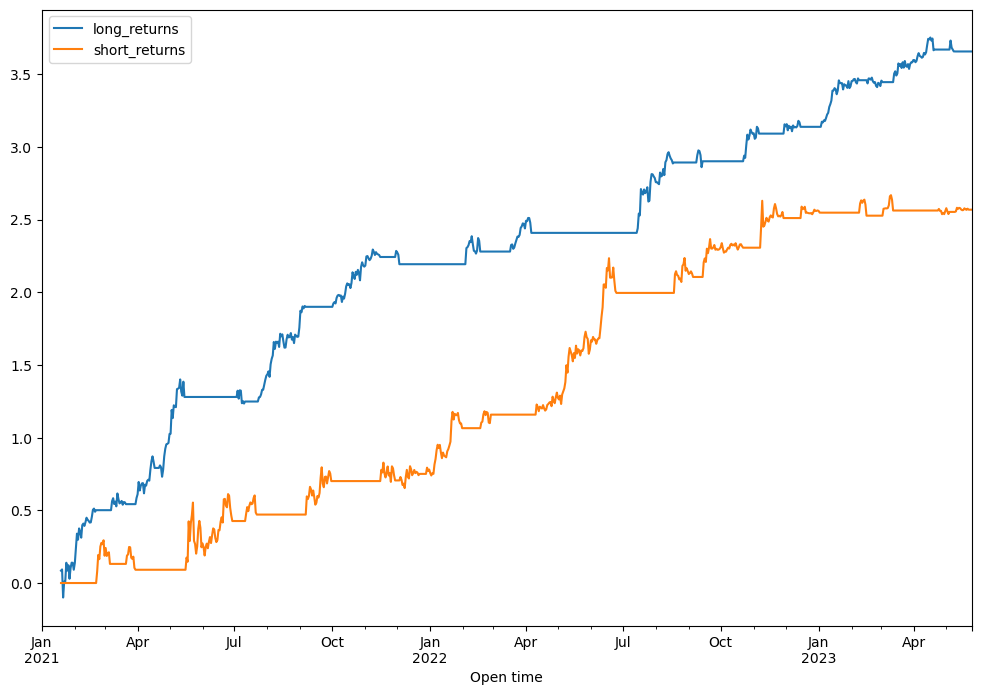

In [96]:
# plot the returns
eth[['long_returns', 'short_returns']].cumsum().plot(figsize=(12,8))


<Axes: xlabel='Open time'>

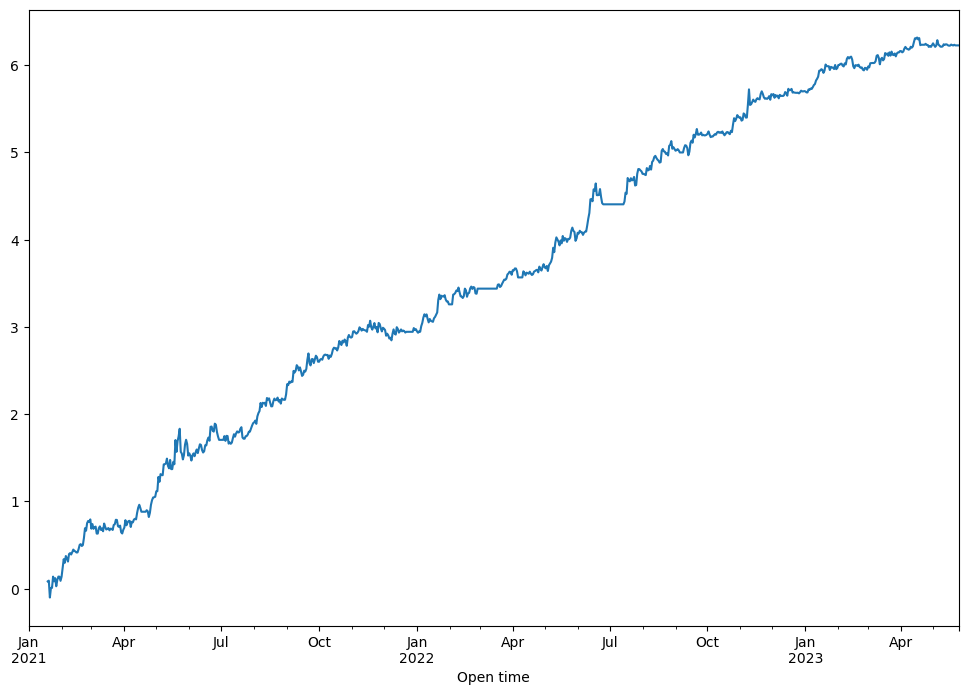

In [97]:
# plot the equity curve 
eth['equity_curve'] = eth['long_returns'].cumsum() + eth['short_returns'].cumsum()
eth['equity_curve'].plot(figsize=(12,8))

In [98]:
# show key statistics 
eth[['long_returns', 'short_returns']].describe()

,long_returns,short_returns
count,857.000000,857.000000
mean,0.004266,0.002996
std,0.028900,0.035088
min,-0.193197,-0.263329
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.001540,0.000000
max,0.181070,0.277372


In [99]:
#show key statistics using vectorbtpro include number of trades and win rate and short performance vs. long performance
eth[['long_returns', 'short_returns']].vbt.returns(freq='1d').stats() 

Start                        2021-01-01 00:00:00+00:00
End                          2023-05-25 00:00:00+00:00
Period                               875 days 00:00:00
Total Return [%]                            1638.10162
Annualized Return [%]                       215.090764
Annualized Volatility [%]                    61.125334
Max Drawdown [%]                             27.181548
Max Drawdown Duration                111 days 12:00:00
Sharpe Ratio                                  2.225635
Calmar Ratio                                  9.572482
Omega Ratio                                   1.639479
Sortino Ratio                                   3.8888
Skew                                          0.734934
Kurtosis                                     10.473103
Tail Ratio                                    1.576709
Common Sense Ratio                             5.02181
Value at Risk                                -0.038913
Name: agg_stats, dtype: object